In [ ]:
import os
import pickle as pkl

import pandas as pd
import numpy as np
import kaggle
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Task description
This jupyter notebook preprocesses the data prior to modeling.

# Download and import data
We will now download the data directly from Kaggle using the Kaggle API, and then import it into a Pandas dataframe. The data is about asteroids and is provided by NeoWS (Near-Earth Object Web Service).

In [ ]:
# download the data from https://www.kaggle.com/shrutimehta/nasa-asteroids-classification using the Kaggle API.
# please adjust the path '/Users/annanau/.local/bin/kaggle' as necessary prior to running
! /Users/annanau/.local/bin/kaggle datasets download -d shrutimehta/nasa-asteroids-classification -p data -q

In [ ]:
# unzip downloaded file
cwd = os.getcwd()
dir_data = os.path.join(cwd, 'data/raw')
path_to_zip_file = 'nasa-asteroids-classification.zip'
with zipfile.ZipFile(os.path.join(dir_data, path_to_zip_file), 'r') as file:
    file.extractall(dir_data)

In [9]:
# import train.csv into a pandas dataframe called total_data
df_nasa = pd.read_csv('../data/nasa.csv')

print(f'df_nasa shape: {df_nasa.shape}')
print('Head of df_nasa:')
display(df_nasa.head(3))

df_nasa shape: (4687, 40)
Head of df_nasa:


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


# Data pre-processing

### Rename columns

In [10]:
# fix column names: replace each ' ' with '_'. 
df_nasa.columns = df_nasa.columns.str.strip().str.lower().str.replace(' ', '_', regex=False).str.replace('(', '_', regex=False).str.replace(')', '', regex=False)

print('Head of df_nasa:')
display(df_nasa.head(3))

Head of df_nasa:


,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min,est_dia_in_km_max,est_dia_in_m_min,est_dia_in_m_max,est_dia_in_miles_min,est_dia_in_miles_max,est_dia_in_feet_min,est_dia_in_feet_max,close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist._astronomical,miss_dist._lunar,miss_dist._kilometers,miss_dist._miles,orbiting_body,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,equinox,hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True


### Check missing values

In [11]:
# missing values analysis
df_nasa.isnull().sum()

neo_reference_id                0
name                            0
absolute_magnitude              0
est_dia_in_km_min               0
est_dia_in_km_max               0
est_dia_in_m_min                0
est_dia_in_m_max                0
est_dia_in_miles_min            0
est_dia_in_miles_max            0
est_dia_in_feet_min             0
est_dia_in_feet_max             0
close_approach_date             0
epoch_date_close_approach       0
relative_velocity_km_per_sec    0
relative_velocity_km_per_hr     0
miles_per_hour                  0
miss_dist._astronomical         0
miss_dist._lunar                0
miss_dist._kilometers           0
miss_dist._miles                0
orbiting_body                   0
orbit_id                        0
orbit_determination_date        0
orbit_uncertainity              0
minimum_orbit_intersection      0
jupiter_tisserand_invariant     0
epoch_osculation                0
eccentricity                    0
semi_major_axis                 0
inclination   

### Feature reduction

In [12]:
# get number of unique values per feature
print(df_nasa.nunique().sort_values(ascending=True))

# 'equinox' and 'orbiting_body' contain only one unique value so drop columns
df_nasa.drop(['equinoix', 'orbiting_body'], axis=1, inplace=True)

equinox                            1
orbiting_body                      1
hazardous                          2
orbit_uncertainity                10
orbit_id                         188
est_dia_in_km_min                269
absolute_magnitude               269
est_dia_in_feet_max              269
est_dia_in_feet_min              269
est_dia_in_miles_min             269
est_dia_in_m_max                 269
est_dia_in_m_min                 269
est_dia_in_km_max                269
est_dia_in_miles_max             269
epoch_osculation                 429
epoch_date_close_approach        777
close_approach_date              777
jupiter_tisserand_invariant     2495
orbit_determination_date        2680
minimum_orbit_intersection      3678
perihelion_time                 3692
perihelion_distance             3692
perihelion_arg                  3692
aphelion_dist                   3692
asc_node_longitude              3692
mean_anomaly                    3692
mean_motion                     3692
o

In [13]:
# check if columns 'name' and 'neo_reference_id' are equal
print(df_nasa['name'].equals(df_nasa['neo_reference_id']))

# since 'name' and 'neo_reference_id' are equal and not important so drop
df_nasa.drop(['name', 'neo_reference_id'], axis=1, inplace=True)

print(f'df_nasa shape: {df_nasa.shape}')

True
df_nasa shape: (4687, 36)


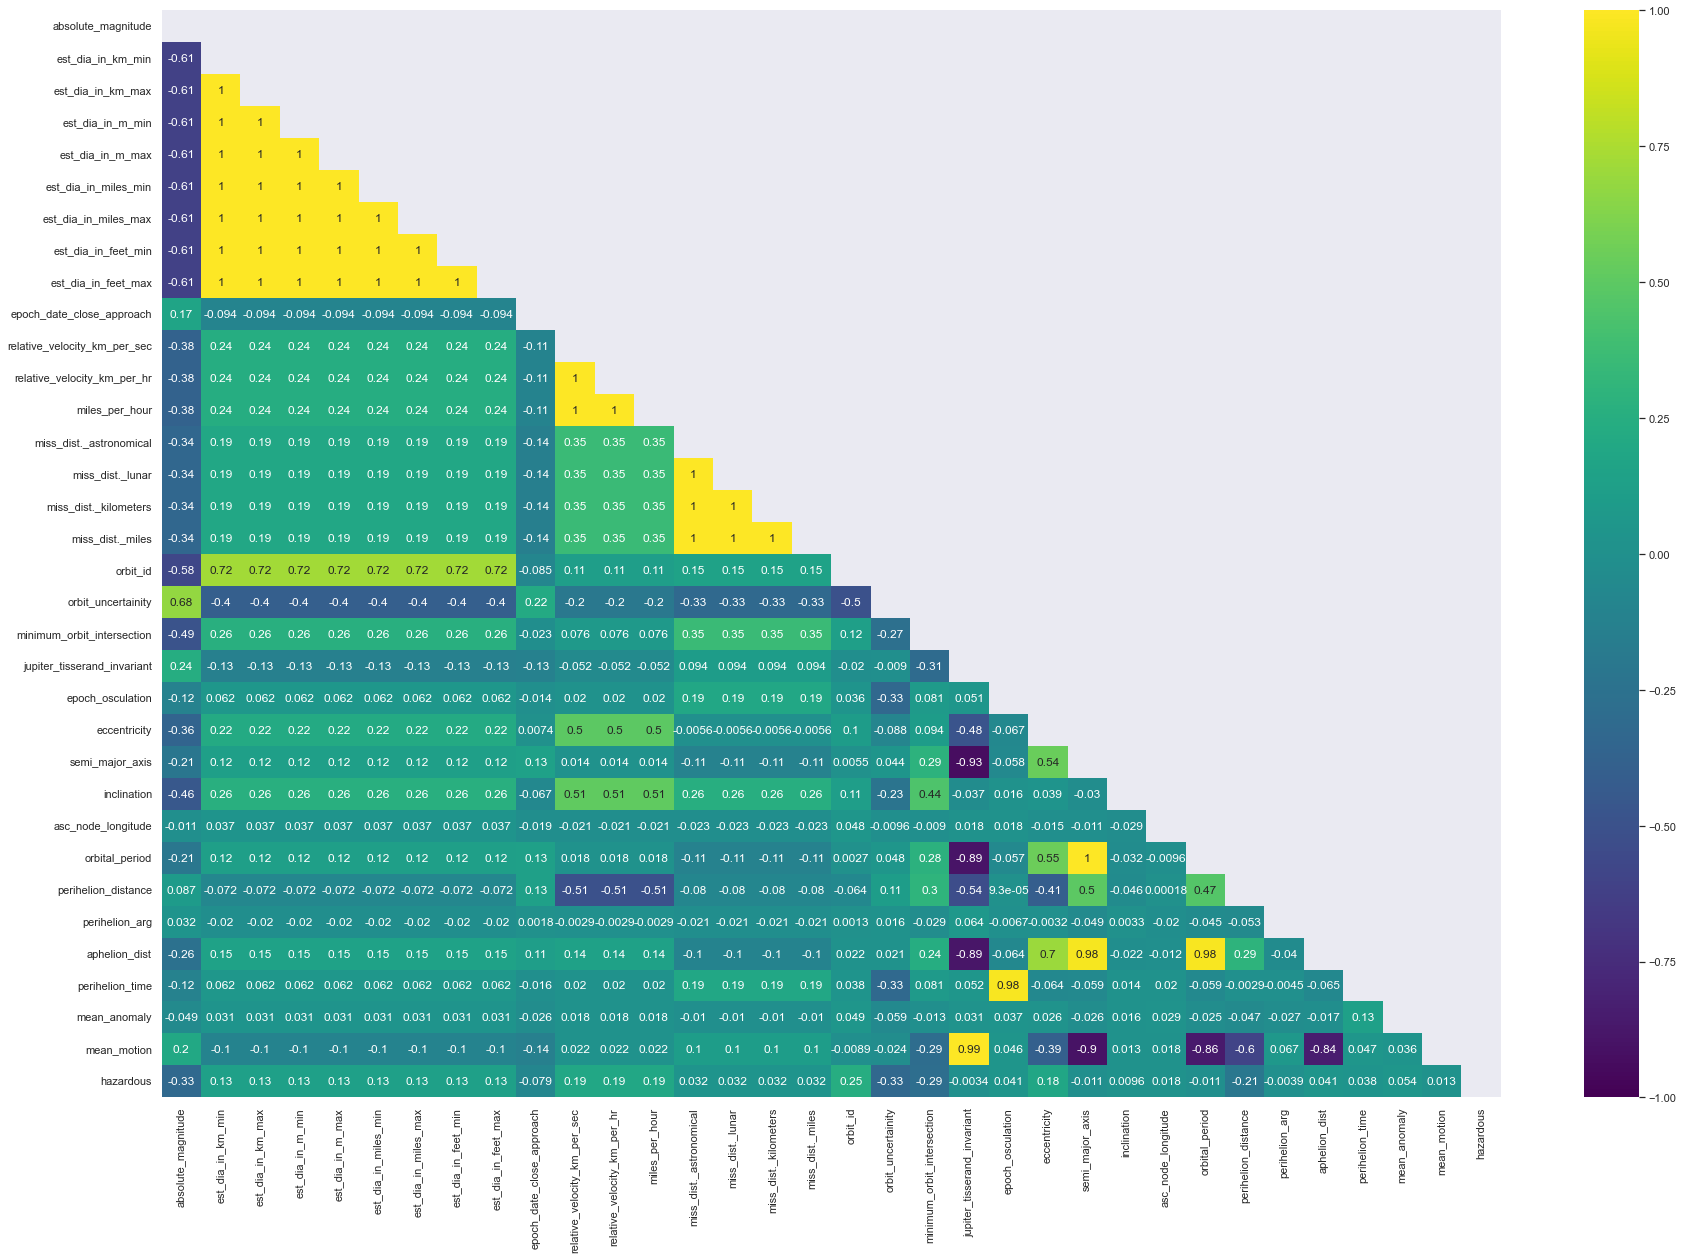

In [14]:
# check visually for feature correlation
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df_nasa.corr(), vmin=-1, vmax=1, cmap='viridis', mask=np.triu(df_nasa.corr()), annot=True)
plt.show()
plt.close()

In [15]:
# Min and max estimated diameter are measured in several units such as km, m, miles, and feet, 
# so only 'est_dia_in_km_min' and 'est_dia_in_km_max' will be considered, but since those two are perfectly correlated,
# only 'est_dia_in_km_max' will be kept

# Relative velocity is measured in km/hour, km/sec and miles/hour, so only 'relative_velocity_km_per_hr' will be kept

# Miss distance is measured in astronomical, lunar, km, and miles, so only keep 'miss_dist._kilometers'

# Date features such as 'close_approach_date', 'epoch_date_close_approach', and 'orbit_determination_date' will
# be dropped because they do not contribute to the fact whether the asteroid will be hazardous or not.

In [16]:
df_nasa.drop(['est_dia_in_km_max','est_dia_in_m_min', 'est_dia_in_m_max', 'est_dia_in_m_min', 'est_dia_in_m_max',
             'est_dia_in_miles_min', 'est_dia_in_miles_max', 'est_dia_in_feet_min', 'est_dia_in_feet_max',
             'relative_velocity_km_per_sec', 'miles_per_hour', 'close_approach_date', 'epoch_date_close_approach',
             'orbit_determination_date', 'miss_dist._astronomical', 'miss_dist._lunar', 'miss_dist._miles'],
            axis=1, inplace=True)

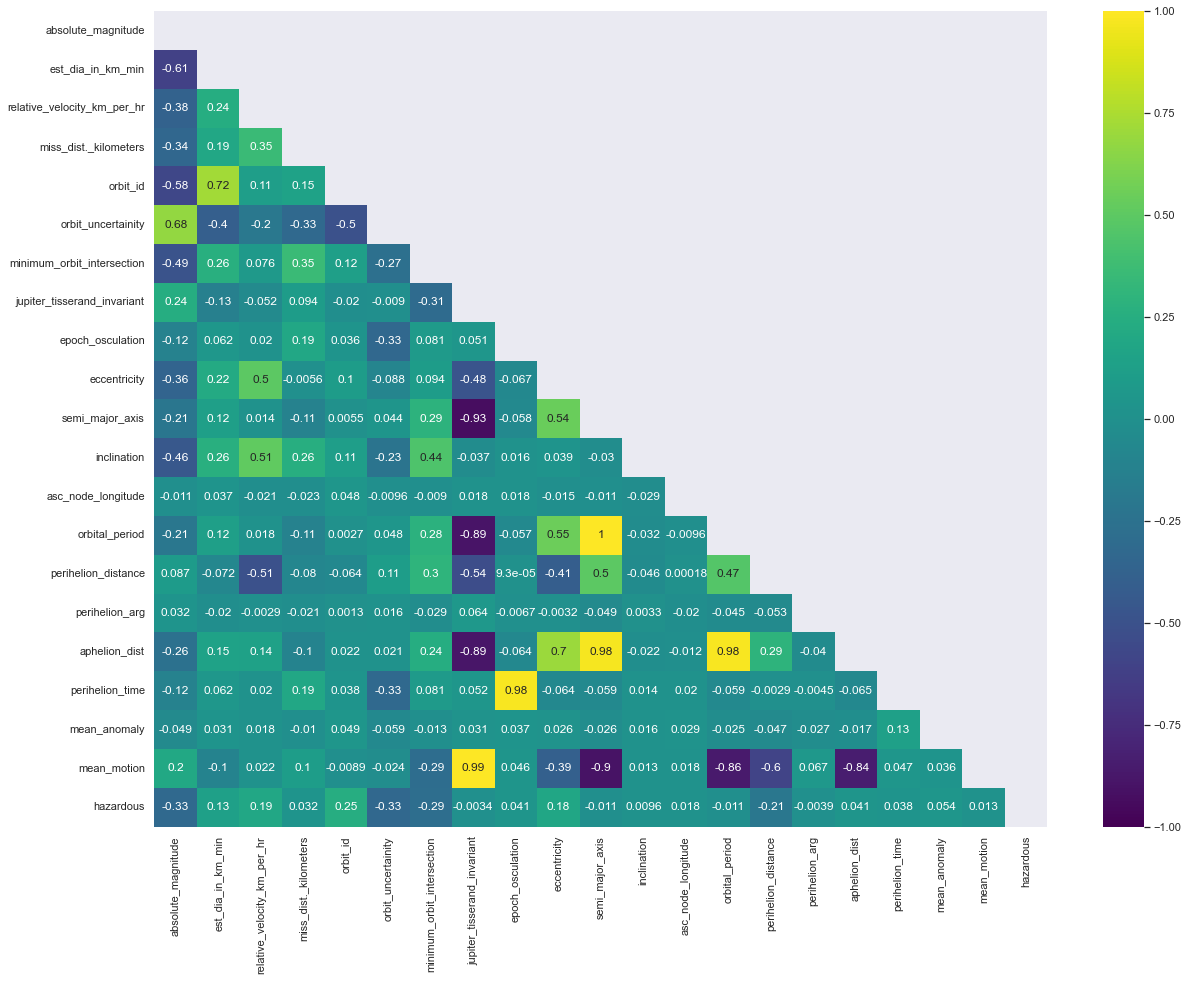

In [17]:
# plotting feature correlation with reduced dataset
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df_nasa.corr(), vmin=-1, vmax=1, cmap="viridis", mask=np.triu(df_nasa.corr()), annot=True)
plt.show()
plt.close()


In [18]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   absolute_magnitude           4687 non-null   float64
 1   est_dia_in_km_min            4687 non-null   float64
 2   relative_velocity_km_per_hr  4687 non-null   float64
 3   miss_dist._kilometers        4687 non-null   float64
 4   orbit_id                     4687 non-null   int64  
 5   orbit_uncertainity           4687 non-null   int64  
 6   minimum_orbit_intersection   4687 non-null   float64
 7   jupiter_tisserand_invariant  4687 non-null   float64
 8   epoch_osculation             4687 non-null   float64
 9   eccentricity                 4687 non-null   float64
 10  semi_major_axis              4687 non-null   float64
 11  inclination                  4687 non-null   float64
 12  asc_node_longitude           4687 non-null   float64
 13  orbital_period    

In [19]:
df_nasa["hazardous"] = df_nasa["hazardous"].astype(int)
display(df_nasa.head())

,absolute_magnitude,est_dia_in_km_min,relative_velocity_km_per_hr,miss_dist._kilometers,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,22017.003799,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,65210.346095,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,27326.560182,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,40225.948191,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,35426.991794,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [20]:
# Min and max estimated diameter are measured in several units such as km, m, miles, and feet, 
# so only 'est_dia_in_km_min' and 'est_dia_in_km_max' will be kept
# Relative velocity is measured in km/hour, km/sec and miles/hour, so only 'relative_velocity_km_per_hr' will be kept

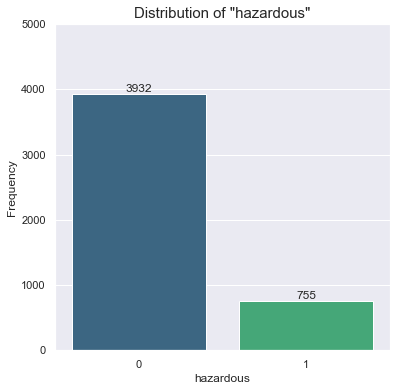

In [21]:
# barplot showing target variable distribution
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x = 'hazardous', data=df_nasa, palette="viridis")
plt.title('Distribution of "hazardous"', fontsize=15)
plt.xlabel('hazardous', size=12)
plt.ylabel('Frequency', size=12)
ax.bar_label(ax.containers[0])
plt.ylim((0, 5000))
plt.show()

In [22]:
df_nasa.head()

,absolute_magnitude,est_dia_in_km_min,relative_velocity_km_per_hr,miss_dist._kilometers,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,22017.003799,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,65210.346095,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,27326.560182,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,40225.948191,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,35426.991794,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [23]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   absolute_magnitude           4687 non-null   float64
 1   est_dia_in_km_min            4687 non-null   float64
 2   relative_velocity_km_per_hr  4687 non-null   float64
 3   miss_dist._kilometers        4687 non-null   float64
 4   orbit_id                     4687 non-null   int64  
 5   orbit_uncertainity           4687 non-null   int64  
 6   minimum_orbit_intersection   4687 non-null   float64
 7   jupiter_tisserand_invariant  4687 non-null   float64
 8   epoch_osculation             4687 non-null   float64
 9   eccentricity                 4687 non-null   float64
 10  semi_major_axis              4687 non-null   float64
 11  inclination                  4687 non-null   float64
 12  asc_node_longitude           4687 non-null   float64
 13  orbital_period    

# Outlier analysis

/var/folders/9z/gcx4w2251dggq9g1f3yhhkfm0000gn/T/ipykernel_10372/1803338358.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


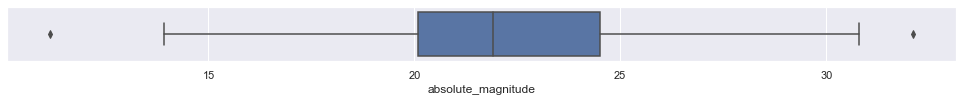

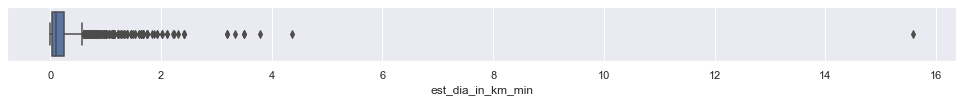

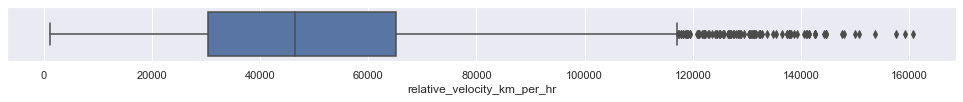

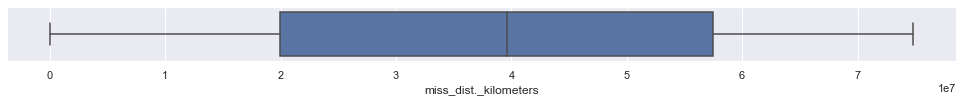

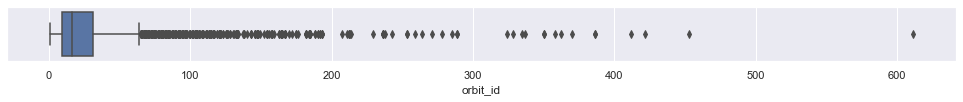

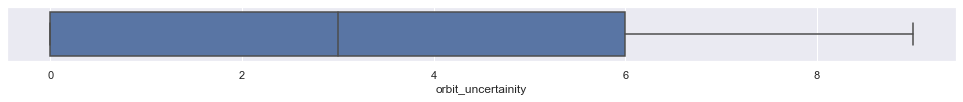

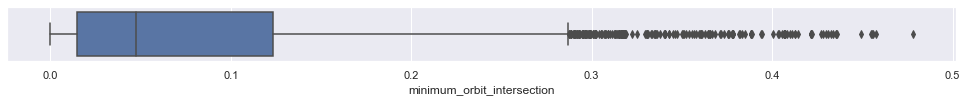

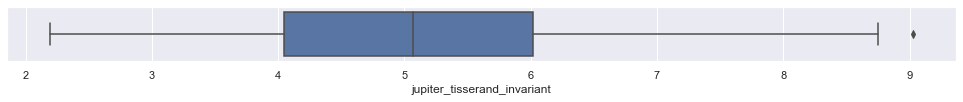

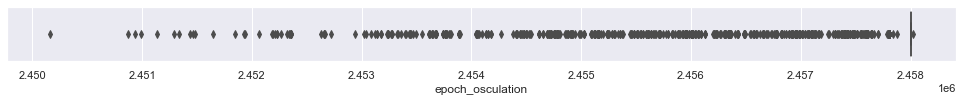

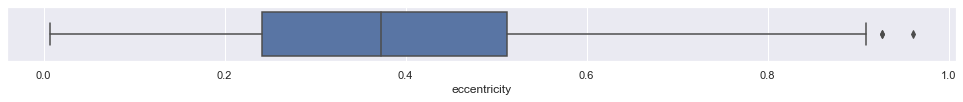

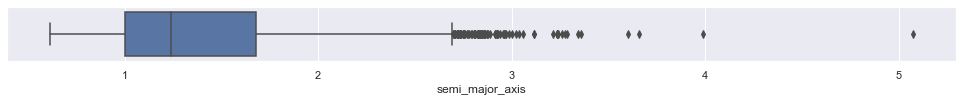

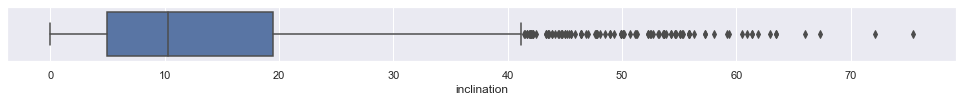

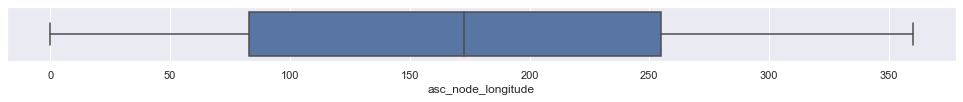

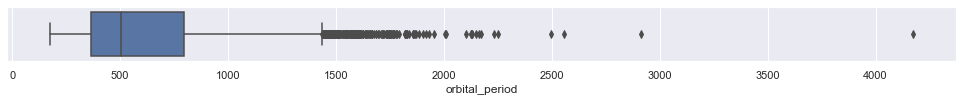

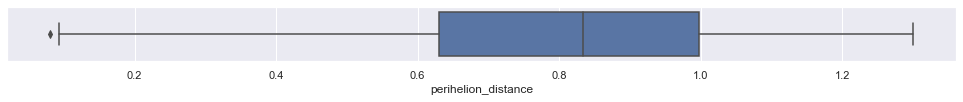

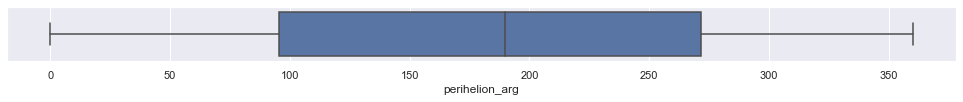

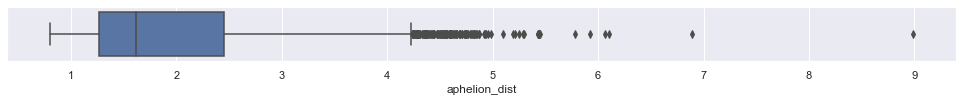

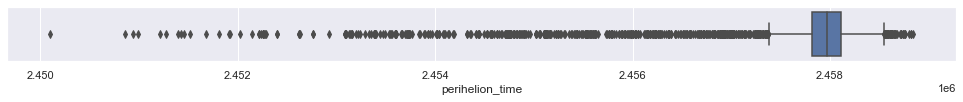

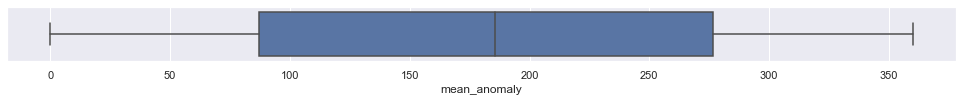

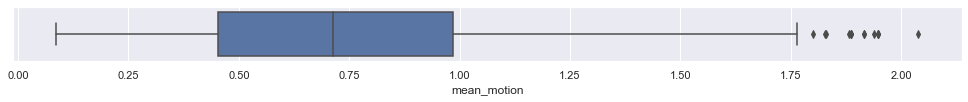

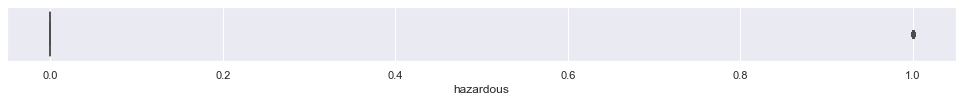

In [24]:
for column in df_nasa:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_nasa, x=column)

# Train/test split

In [25]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_nasa.iloc[:, :-1], df_nasa.hazardous, 
                                                    test_size=0.2, random_state=0)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print()
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3749, 20)
y_train shape: (3749,)

X_test shape: (938, 20)
y_test shape: (938,)


# Min-max scaling

In [26]:
df_nasa.columns

Index(['absolute_magnitude', 'est_dia_in_km_min',
       'relative_velocity_km_per_hr', 'miss_dist._kilometers', 'orbit_id',
       'orbit_uncertainity', 'minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'eccentricity',
       'semi_major_axis', 'inclination', 'asc_node_longitude',
       'orbital_period', 'perihelion_distance', 'perihelion_arg',
       'aphelion_dist', 'perihelion_time', 'mean_anomaly', 'mean_motion',
       'hazardous'],
      dtype='object')

In [28]:
# define standard scaler
scaler = MinMaxScaler()
# get scale parameters from train set 
scaler.fit(X_train)
# scale data
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['absolute_magnitude', 'est_dia_in_km_min',
       'relative_velocity_km_per_hr', 'miss_dist._kilometers', 'orbit_id',
       'orbit_uncertainity', 'minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'eccentricity',
       'semi_major_axis', 'inclination', 'asc_node_longitude',
       'orbital_period', 'perihelion_distance', 'perihelion_arg',
       'aphelion_dist', 'perihelion_time', 'mean_anomaly', 'mean_motion'])
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['absolute_magnitude', 'est_dia_in_km_min',
       'relative_velocity_km_per_hr', 'miss_dist._kilometers', 'orbit_id',
       'orbit_uncertainity', 'minimum_orbit_intersection',
       'jupiter_tisserand_invariant', 'epoch_osculation', 'eccentricity',
       'semi_major_axis', 'inclination', 'asc_node_longitude',
       'orbital_period', 'perihelion_distance', 'perihelion_arg',
       'aphelion_dist', 'perihelion_time', 'mean_anomaly', 'mean_motion'])

In [29]:
pd.DataFrame(X_train_scaled).describe()

,absolute_magnitude,est_dia_in_km_min,relative_velocity_km_per_hr,miss_dist._kilometers,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.529094,0.013339,0.304936,0.514749,0.045317,0.389496,0.170802,0.434297,0.962900,0.396561,0.228977,0.183897,0.476630,0.165874,0.599348,0.509525,0.183687,0.873761,0.509686,0.335040
std,0.138514,0.025073,0.164145,0.291782,0.064583,0.342454,0.186709,0.188140,0.116407,0.188210,0.154824,0.150322,0.285352,0.133962,0.196325,0.287045,0.157550,0.107465,0.297610,0.186827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.426934,0.002184,0.180162,0.266575,0.013115,0.000000,0.029841,0.280702,0.997581,0.250612,0.109075,0.068016,0.230838,0.066375,0.450345,0.262901,0.062739,0.883268,0.243630,0.177246
50%,0.512894,0.007048,0.281566,0.530918,0.024590,0.333333,0.099848,0.435545,0.997581,0.386756,0.181649,0.141732,0.478337,0.118198,0.613347,0.526072,0.122455,0.901316,0.525284,0.321457
75%,0.632283,0.016229,0.398518,0.771570,0.049180,0.666667,0.254377,0.582914,0.997581,0.530914,0.315715,0.267211,0.701850,0.227661,0.750614,0.751716,0.263637,0.916881,0.772227,0.471796
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
pd.DataFrame(X_test_scaled).describe()

,absolute_magnitude,est_dia_in_km_min,relative_velocity_km_per_hr,miss_dist._kilometers,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,0.535926,0.011991,0.301169,0.508279,0.042509,0.395878,0.178055,0.444430,0.960057,0.382022,0.224043,0.190443,0.485159,0.162771,0.607468,0.516510,0.176515,0.869411,0.478049,0.345402
std,0.136166,0.017276,0.170871,0.291953,0.054999,0.340486,0.197679,0.191478,0.120164,0.193724,0.161617,0.156644,0.293338,0.144024,0.207222,0.289633,0.162910,0.110364,0.301786,0.192145
min,0.154728,0.000053,-0.005236,-0.000100,0.000000,0.000000,0.000027,0.006712,0.142966,0.000000,-0.005750,0.001513,0.000502,-0.003066,0.031634,0.001434,-0.015052,0.133846,0.000436,-0.020481
25%,0.436485,0.001986,0.174853,0.266597,0.013115,0.000000,0.032692,0.300229,0.997581,0.225548,0.106867,0.070123,0.229008,0.064889,0.460350,0.275954,0.059290,0.880329,0.217983,0.193786
50%,0.517670,0.006728,0.276260,0.527063,0.024590,0.333333,0.093946,0.447750,0.997581,0.367225,0.175183,0.145990,0.487815,0.113355,0.627058,0.535744,0.114490,0.898920,0.475444,0.331863
75%,0.641834,0.014795,0.390960,0.758729,0.049180,0.666667,0.270115,0.586384,0.997581,0.524703,0.294200,0.277626,0.728569,0.208983,0.760278,0.762329,0.240504,0.913754,0.744146,0.477841
max,0.937918,0.224855,0.980852,0.999510,0.572131,1.000000,0.954125,1.041800,0.997581,0.946310,1.322197,1.045198,0.999906,1.462105,0.999173,0.999421,1.348805,0.989309,0.998995,1.050571


# PCA
For data visualization and modeling

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [37]:
# Obtain the principal components 
pca = PCA(n_components=0.95)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_train_scaled_pca = pd.DataFrame(X_train_scaled_pca)
X_test_scaled_pca = pca.transform(X_test_scaled)
X_test_scaled_pca = pd.DataFrame(X_test_scaled_pca)

In [38]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.20781356 0.19602801 0.11332258 0.10215549 0.10159182 0.0840258
 0.08184062 0.04026899 0.02545379]


In [39]:
print ( "Components = ", pca.n_components_ , "\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  9 
Total explained variance =  0.9525


In [41]:
display(X_train_scaled_pca.head())
display(X_test_scaled_pca.head())

,0,1,2,3,4,5,6,7,8
0,-0.506170,-0.011410,-0.583445,0.238933,0.253041,0.161992,0.681486,0.176304,-0.077116
1,0.554315,-0.450331,-0.035340,0.436950,0.136130,0.099776,0.411394,0.639686,0.185115
2,-0.185390,-0.182194,0.321636,0.452450,-0.269928,-0.076236,0.000904,-0.307182,0.037445
3,-0.616406,-0.588243,0.386735,-0.078622,-0.103301,-0.038093,0.089268,0.269261,-0.007092
4,0.739041,-0.120397,-0.579831,0.411383,-0.138187,-0.137208,-0.146959,0.229514,0.253688


,0,1,2,3,4,5,6,7,8
0,0.848641,0.368169,0.543705,-0.226989,-0.245103,-0.000936,0.201558,-0.007642,-0.030164
1,-0.469620,0.202503,0.325577,0.222538,-0.311638,-0.155447,-0.109639,-0.076578,0.057659
2,-0.500901,-0.633043,0.011478,0.022067,-0.470865,0.026202,0.081253,-0.288274,0.096208
3,-0.265087,-0.859178,-0.190746,-0.507936,-0.467412,-0.095878,0.436971,0.151826,-0.012116
4,-0.233144,0.004384,-0.110587,-0.403486,-0.013790,-0.335281,0.299654,0.229373,-0.048336


# Save processed data

In [43]:
# Save normalized data
with open("../data/processed/train_scaled.pkl", "wb") as f:
    pkl.dump([X_train_scaled, y_train], f)
    
with open("../data/processed/test_scaled.pkl", "wb") as f:
    pkl.dump([X_test_scaled, y_test], f)

In [44]:
# Save normalized + PCA data
with open("../data/processed/train_scaled_pca.pkl", "wb") as f:
    pkl.dump([X_train_scaled_pca, y_train], f)
    
with open("../data/processed/test_scaled_pca.pkl", "wb") as f:
    pkl.dump([X_test_scaled_pca, y_test], f)

In [45]:
# Load normalized data
with open("../data/processed/train_scaled.pkl", "rb") as f:
    X_train_scaled, y_train = pkl.load(f)
    
with open("../data/processed/test_scaled.pkl", "rb") as f:
    X_test_scaled, y_test = pkl.load(f)
    
print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

(3749, 20) (3749,)
(938, 20) (938,)


In [46]:
# Load normalized + PCA data
with open("../data/processed/train_scaled_pca.pkl", "rb") as f:
    X_train_scaled_pca, y_train = pkl.load(f)
    
with open("../data/processed/test_scaled_pca.pkl", "rb") as f:
    X_test_scaled_pca, y_test = pkl.load(f)
    
print(X_train_scaled_pca.shape, y_train.shape)
print(X_test_scaled_pca.shape, y_test.shape)

(3749, 9) (3749,)
(938, 9) (938,)


# Other 

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_nasa['hazardous'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'pca1']
               , df_pca.loc[indicesToKeep, 'pca2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

In [ ]:
def pca(X_train, X_test, variance):
    pca = PCA(variance)
    pca.fit(X_train)
    
    X_train_scaled_pca = pca.transform(X_train)
    X_test_scaled_pca = pca.transform(X_test)
    
    print(f'Number of PC for variance={variance}: {pca.n_components_}')
    
    return X_train_scaled_pca, X_test_scaled_pca